<a href="https://colab.research.google.com/github/SlowestThunder/Signature-Verification/blob/practice/Real_or_Forge_Signature_Detection_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![link text](https://blog.accubits.com/wp-content/uploads/2017/07/dfgdf.jpg)

# (Q1)Whats is basically Handwritten Signature Verification ?

> **Signature verification** and **forgery detection** is the **process** of **verifying signatures automatically and instantly** to
**determine whether the signature is real or not**. There are **two** main **kinds** of **signature verification**: **static** and
**dynamic**. **Static**, or off-line verification is the **process** of **verifying a document signature after it has been made**,
while **dynamic** or on-line verification takes place **as a person creates his/her signature on a digital tablet or a
similar device**.

 In the case **handwritten** **signature** on a **document**, the **computer needs the samples to be
scanned for investigation**, whereas a **digital signature** which is **already stored** in a **data format** can be **used** for
**signature verification**. **Handwritten signature** is one of the **most** generally **accepted** **personal attributes** for
**verification** with identity whether it may for banking or business


![link text](https://miro.medium.com/max/1150/0*CSOpSnaOK0BHL__c) ![image](https://static01.nyt.com/images/2020/10/01/us/mail-voting-ballots-signature-matching-promo-1601568554088/mail-voting-ballots-signature-matching-promo-1601568554088-superJumbo.jpg)

### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Displaying the of Image of Forge and Real Signature

'\nimage6 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_1.png")\nimage7 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_10.png")\nimage8 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_11.png")\nimage9 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_12.png")\nimage10 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_13.png")\n\nfig, ax1 = plt.subplots(1,5, figsize = (15,10))\n\nax1[0].imshow(image6)\nax1[0].set_title("Forge_10")\nax1[1].imshow(image7)\nax1[1].set_title("Forge_10")\nax1[2].imshow(image8)\nax1[2].set_title("Forge_10")\nax1[3].imshow(image9)\nax1[3].set_title("Forge_10")\nax1[4].imshow(image10)\nax1[4].set_title("Forge_10")"\n'

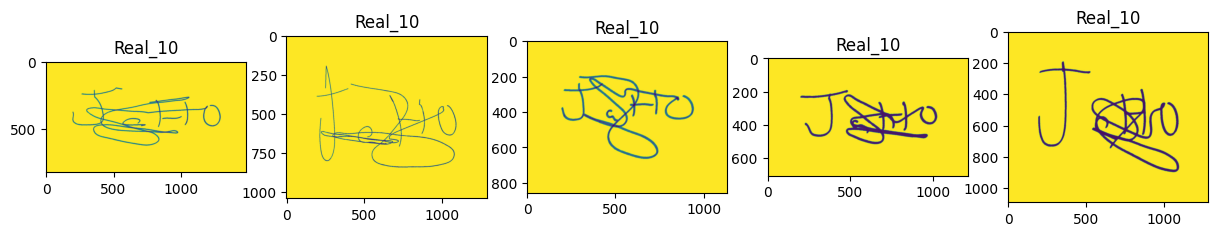

In [ ]:
image1 = sk.imread("/train/forge/cf-001-01 (Copy).jpg")
image2 = sk.imread("/train/forge/cf-001-02 (Copy).jpg")
image3 = sk.imread("/train/forge/cf-001-03 (Copy).jpg")
image4 = sk.imread("/train/forge/cf-001-04 (Copy).jpg")
image5 = sk.imread("/train/forge/cf-001-05 (Copy).jpg")

fig, ax = plt.subplots(1,5, figsize = (15,10))

ax[0].imshow(image1)
ax[0].set_title("Real_10")
ax[1].imshow(image2)
ax[1].set_title("Real_10")
ax[2].imshow(image3)
ax[2].set_title("Real_10")
ax[3].imshow(image4)
ax[3].set_title("Real_10")
ax[4].imshow(image5)
ax[4].set_title("Real_10")
"""
image6 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_1.png")
image7 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_10.png")
image8 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_11.png")
image9 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_12.png")
image10 = sk.imread("/content/drive/My Drive/Real-Forg-Signature/Train/Forge/forgeries_10_13.png")

fig, ax1 = plt.subplots(1,5, figsize = (15,10))

ax1[0].imshow(image6)
ax1[0].set_title("Forge_10")
ax1[1].imshow(image7)
ax1[1].set_title("Forge_10")
ax1[2].imshow(image8)
ax1[2].set_title("Forge_10")
ax1[3].imshow(image9)
ax1[3].set_title("Forge_10")
ax1[4].imshow(image10)
ax1[4].set_title("Forge_10")"
"""

## Surpised? Can't tell the difference can we? This is exceptional , Now that's why it is so difficult to identify.

The **handwritten signature** is a **behavioral biometric** which is **not based on any physiology characteristics** of the
**individual signature** but on the behavior that change over time. **Since an individual's signature alters over time the
verification and authentication for the signature may take a long period which includes the errors to be higher in some cases**. **Inconsistent signature leads to higher false rejection rates for an individual· who did not sign in a consistent way**.

# Data Acquisition

**Handwritten signatures** are **collected** and some **unique features** are **extracted** to **create** **knowledge base for each
and every individual**. A **standard database** of **signatures** for every **individual** is **needed** for **evaluating performance**
of the **signature verification system** and **also for comparing the result obtained using other techniques' on the same
database**.

![image](https://miro.medium.com/max/1232/1*4fs8WX3prcmSQjGcVhV0Ng.png)

## Data Pre-Processing & Model Building

* In this notebook we will be using trainsfer learning technique to build our model but before that we need to cnvert our images to 224x224.

In [4]:
train_path = '/content/drive/MyDrive/DataSet/train'
test_path = '/content/drive/MyDrive/DataSet/test'

In [5]:
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=15

In [6]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 510, 510, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 253, 253, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 124, 124, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │              

 Total params: 6,884,034 (26.26 MB)

 Trainable params: 6,881,026 (26.25 MB)

 Non-trainable params: 3,008 (11.75 KB)

## What are callbacks?

* Callbacks is a powerfull tool which is used to customize the behaviour of keras or tensorflow model during training, evaluaton or inference

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]


## Data Pre-processing

* Now we need to read all the images from the folder.
* When we'll be reading the data from the folders we also need to make sure that we need to do some Data Augmentation.
* The Data Augmentation can be done by using ImageDataGenerator library.
* The ImageDataGenerator what is does that it applies the Data Augmentation techniques like zooming, scaling, horizontal flipping, vertical flipping, etc.
* **IN THE TEST DATA WE SHOULD NEVER PERFORM DATA AUGMENTATION WE SHOULD ONLY PERFORM SCALING**.

In [9]:
# Scaling all the images between 0 to 1 and applying Data Augmentation

train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,)

In [10]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/DataSet/train',
                                              target_size=Image_Size,
                                              batch_size=32,
                                              class_mode = 'categorical')


Found 4830 images belonging to 2 classes.


In [11]:
# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/DataSet/test',
                                                  target_size=Image_Size,
                                                  batch_size = 32,
                                                  class_mode='categorical')

Found 3300 images belonging to 150 classes.


In [31]:
# epochs = 5

# history = model.fit(train_generator,
#                     epochs=epochs,
#                     validation_data=test_generator,
#                     validation_steps=len(test_generator),
#                     steps_per_epoch=len(train_generator),
#                     callbacks=callbacks)
epochs = 5

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size + 1,  # +1 for any remainder
    steps_per_epoch=train_generator.samples // train_generator.batch_size + 1,   # +1 for any remainder
    callbacks=callbacks
)

Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.5299 - loss: 58.8956 - val_accuracy: 0.0067 - val_loss: 5.0107 - learning_rate: 0.0010
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.5362 - loss: 46.8090 - val_accuracy: 0.0067 - val_loss: 5.0107 - learning_rate: 0.0010
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.5339 - loss: 64.6038 - val_accuracy: 0.0067 - val_loss: 5.0107 - learning_rate: 0.0010
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.5234 - loss: 51.5131 - val_accuracy: 0.0079 - val_loss: 5.0107 - learning_rate: 0.0010
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.5289 - loss: 50.5716 - val_accuracy: 0.0067 - val_loss: 5.0107 - learning_rate: 0.0010


In [27]:
# ... (Your existing model layers) ...

# Change the final layer
num_classes = 150  # Replace with the actual number of classes in your dataset
model.add(Dense(num_classes, activation='softmax'))

# ... (Rest of your model code) ...

## Plotting the Accuracy and Losses

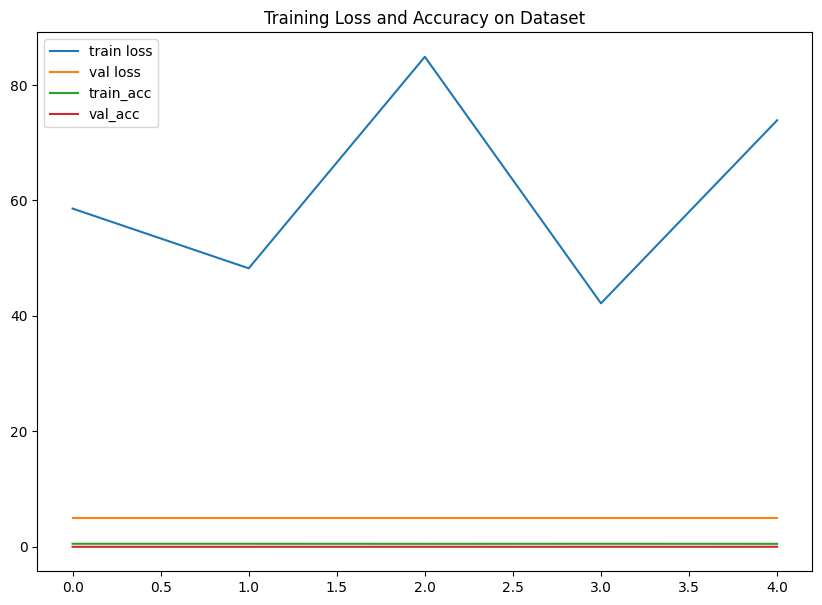

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

## Saving our model

In [34]:
from tensorflow.keras.models import load_model

model.save('forge_real_signature_model.h5')

## Making our prediction with our model

In [35]:
pred = model.predict(test_generator)
pred

104/104 ━━━━━━━━━━━━━━━━━━━━ 48s 461ms/step


array([[0.00662273, 0.00669873, 0.00667405, ..., 0.00667249, 0.0067097 ,
        0.00667355],
       [0.00662273, 0.00669873, 0.00667405, ..., 0.00667249, 0.0067097 ,
        0.00667355],
       [0.00662273, 0.00669873, 0.00667405, ..., 0.00667249, 0.0067097 ,
        0.00667355],
       ...,
       [0.00662273, 0.00669873, 0.00667405, ..., 0.00667249, 0.0067097 ,
        0.00667355],
       [0.00662273, 0.00669873, 0.00667405, ..., 0.00667249, 0.0067097 ,
        0.00667355],
       [0.00662273, 0.00669873, 0.00667405, ..., 0.00667249, 0.0067097 ,
        0.00667355]], dtype=float32)

In [36]:
import numpy as np

pred = np.argmax(pred, axis=1)
pred

array([34, 34, 34, ..., 34, 34, 34])

## Loading our model

In [37]:
model = load_model('forge_real_signature_model.h5')

In [38]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/drive/My Drive/Real-Forg-Signature/Test/Forge/forgeries_43_18.png', target_size=(512,512))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Real-Forg-Signature/Test/Forge/forgeries_43_18.png'

In [ ]:
x = image.img_to_array(img)
x

array([[[250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [254., 254., 254.]],

       [[252., 252., 252.],
        [248., 248., 248.],
        [254., 254., 254.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [253., 253., 253.]],

       [[252., 252., 252.],
        [248., 248., 248.],
        [254., 254., 254.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [253., 253., 253.]],

       ...,

       [[252., 252., 252.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [251., 251., 251.]],

       [[252., 252., 252.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [251., 251., 251.]],

       [[252., 252., 252.],
        [254., 254., 254.],
        [255., 2

In [ ]:
x.shape

(512, 512, 3)

In [ ]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 512, 512, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("The signature is not fraud")
else:
    print("The signature is fraud")

The signature is fraud


* Our model has successfully predicted that it is a Forge signature.

## Conclusion

A model that can learn from signatures and make predictions as to whether the signature in question is a forgery
or not, has been successfully implemented. This model can be deployed at various government offices where
handwritten signatures are used as a means of approval or authentication. While this method uses CNNs to
learn the signatures, the structure of our fully connected layer is not optimal. This implementation may be
considered extreme. In the model created in this work, two classes are created for each user (Real and forgery).
We have 30 users and thus we have a model with 60 classes to predict. The best accuracy we got was 95.5%.

REFERENCES

1. A. Karpathy ”Backpropagation, Intuitions” from Stanford’s CS231n, http://cs231n.github.io/optimization-2/, 2015

2. K. Simonyan, A. Zisserman ”Very Deep Convolutional Networks for Large-Scale Image Recognition” in ICLR 2015

3. https://philarchive.org/archive/ALAHSV

## If you like it dont forget to star/upvote it :)